## Analysis of the top 5000 YouTube channels

### 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### 2. Import dataset

In [ ]:
youtube_data = pd.read_csv(r'top-5000-youtube-channels.csv')

### 3. Review dataset
#### Top 5 rows and bottom 5 rows

In [ ]:
youtube_data.head(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [ ]:
youtube_data.tail(5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


#### Dataframe shape and size 

##### Dataframe shape - number of rows and columns in the dataframe
##### Dataframe size is the total number of elements (cells) in the dataframe 

In [ ]:
youtube_data.shape

(5000, 6)

In [ ]:
youtube_data.size

30000

#### Column names

In [ ]:
youtube_data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

#### Dataframe info and summary statistics

In [ ]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [ ]:
youtube_data.describe(include="all")

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,5000,5000,5.000000e+03
unique,5000,6,4993,2286,4612,NaN
top,1st,B+,Thơ Nguyễn,26,--,NaN
freq,1,2956,2,17,387,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.071449e+09
std,NaN,NaN,NaN,NaN,NaN,2.003844e+09
min,NaN,NaN,NaN,NaN,NaN,7.500000e+01
25%,NaN,NaN,NaN,NaN,NaN,1.862329e+08
50%,NaN,NaN,NaN,NaN,NaN,4.820548e+08
75%,NaN,NaN,NaN,NaN,NaN,1.124368e+09


#### Column "Video views" is described in exponential format. Convert column "Video Views" to decimal format. 

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
youtube_data.describe(include="all")

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
count,5000,5000,5000,5000,5000,5000.00
unique,5000,6,4993,2286,4612,NaN
top,1st,B+,Thơ Nguyễn,26,--,NaN
freq,1,2956,2,17,387,NaN
mean,NaN,NaN,NaN,NaN,NaN,1071449400.15
std,NaN,NaN,NaN,NaN,NaN,2003843972.12
min,NaN,NaN,NaN,NaN,NaN,75.00
25%,NaN,NaN,NaN,NaN,NaN,186232945.75
50%,NaN,NaN,NaN,NaN,NaN,482054780.00
75%,NaN,NaN,NaN,NaN,NaN,1124367826.75


#### Visual representation of missing values 

<AxesSubplot:>

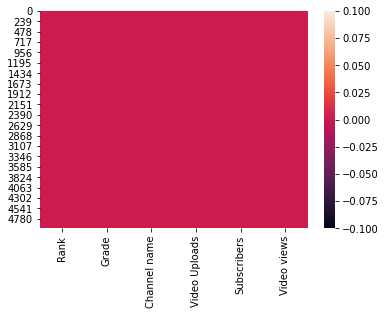

In [ ]:
sns.heatmap(youtube_data.isnull())

In [ ]:
youtube_data.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

#### Review values in each column

In [ ]:
column_list = list(youtube_data.columns)

for col in column_list:
    print(f'For column "{col}" the values are:')
    print((youtube_data[col].value_counts(ascending=False)), "\n")

For column "Rank" the values are:
1st        1
3,331st    1
3,338th    1
3,337th    1
3,336th    1
          ..
1,667th    1
1,666th    1
1,665th    1
1,664th    1
5,000th    1
Name: Rank, Length: 5000, dtype: int64 

For column "Grade" the values are:
B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: Grade, dtype: int64 

For column "Channel name" the values are:
Thơ Nguyễn                 2
Various Artists - Topic    2
Learn Colors For Kids      2
Super Kids                 2
Funny Vines                2
                          ..
MeLlamanFredy              1
Soosloli PoP               1
SBS 뉴스                     1
酷酷的文                       1
SehatAQUA                  1
Name: Channel name, Length: 4993, dtype: int64 

For column "Video Uploads" the values are:
26       17
20       17
8        16
84       16
52       16
         ..
582       1
3124      1
1742      1
40763     1
3475      1
Name: Video Uploads, Length: 2286, dtype: int64 

For co

Column "Subscribers" has "--" characters replacing values 387 times. This wil be addressed during data cleaning.

### 4. Data Cleaning 

Identify and remove missing and inconsitent values. Convert column values for columns Rank, Grade, Video Uploads, Subscribers, Video views to numerical format to use in data analysis and visualizations. 
Standardize column names. 

#### Replace '--' with NaN

In [ ]:
youtube_data.replace('--', np.nan, regex=True, inplace = True)

In [ ]:
youtube_data.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [ ]:
youtube_data.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

Visual representation of missing values in the dataframe

<AxesSubplot:>

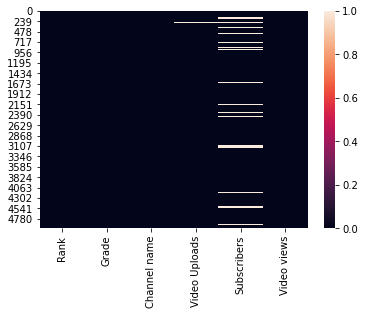

In [ ]:
sns.heatmap(youtube_data.isnull())

#### Find percentage of missing values

In [ ]:
missing_percentage = youtube_data.isna().sum() *100 /len(youtube_data)
missing_percentage

Rank            0.00
Grade           0.00
Channel name    0.00
Video Uploads   0.12
Subscribers     7.74
Video views     0.00
dtype: float64

#### Drop rows containing missing values 

In [ ]:
youtube_data.dropna(axis = 0, inplace=True)

#### Clean "Rank" column.
###### Remove comma from number representation 1,000
###### Drop the 'st', 'nd', 'th' endings 
###### Convert "Rank" column to integer data type


In [ ]:
youtube_data['Rank'] = youtube_data['Rank'].str.replace(',','').str[0:-2]

In [ ]:
youtube_data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [ ]:
youtube_data['Rank'] = youtube_data['Rank'].astype('int')

In [ ]:
youtube_data['Rank'].dtype

dtype('int32')

#### Clean "Grade" column
##### Find unique values, replace with numerical grades. 

In [ ]:
youtube_data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [ ]:
# Make a copy of "Grade" column for use in visualizations
youtube_data['Grade_letter'] = youtube_data['Grade']

In [ ]:
youtube_data['Grade'] = youtube_data['Grade'].map({'A++ ': 5, 'A+ ':4, 'A ':3, 'A- ':2, 'B+ ':1})

In [ ]:
youtube_data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Grade_letter
0,1,5,Zee TV,82757,18752951,20869786591,A++
1,2,5,T-Series,12661,61196302,47548839843,A++
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,A++
3,4,5,SET India,27323,31180559,22675948293,A++
4,5,5,WWE,36756,32852346,26273668433,A++


#### Clean "Video Uploads" and "Subscribers" column

In [ ]:
youtube_data['Video Uploads'] = youtube_data['Video Uploads'].astype('int')
youtube_data['Subscribers'] = youtube_data['Subscribers'].astype('int')

In [ ]:
youtube_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4610 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           4610 non-null   int32 
 1   Grade          4610 non-null   int64 
 2   Channel name   4610 non-null   object
 3   Video Uploads  4610 non-null   int32 
 4   Subscribers    4610 non-null   int32 
 5   Video views    4610 non-null   int64 
 6   Grade_letter   4610 non-null   object
dtypes: int32(3), int64(2), object(2)
memory usage: 234.1+ KB


In [ ]:
youtube_data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,Grade_letter
0,1,5,Zee TV,82757,18752951,20869786591,A++
1,2,5,T-Series,12661,61196302,47548839843,A++
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,A++
3,4,5,SET India,27323,31180559,22675948293,A++
4,5,5,WWE,36756,32852346,26273668433,A++


#### Standardize column names

In [ ]:
youtube_data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Grade_letter'],
      dtype='object')

In [ ]:
youtube_data.rename(columns={"Channel name": "Channel_name", "Video Uploads": "Video_uploads", 
"Video views":"Video_views", "Average views":"Average_views"}, inplace = True)

In [ ]:
youtube_data.columns

Index(['Rank', 'Grade', 'Channel_name', 'Video_uploads', 'Subscribers',
       'Video_views', 'Grade_letter'],
      dtype='object')

### 5. Feature Engineering
#### Find average number of views for each upload per channel and add it as new column 

In [ ]:
youtube_data['Average_views'] = youtube_data['Video_views'] / youtube_data['Video_uploads']

In [ ]:
youtube_data.head()

,Rank,Grade,Channel_name,Video_uploads,Subscribers,Video_views,Grade_letter,Average_views
0,1,5,Zee TV,82757,18752951,20869786591,A++,252181.53
1,2,5,T-Series,12661,61196302,47548839843,A++,3755535.89
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082,A++,26255509.60
3,4,5,SET India,27323,31180559,22675948293,A++,829921.62
4,5,5,WWE,36756,32852346,26273668433,A++,714813.05


### 6. Data Analysis and Visualization

In [ ]:
# Number of unique channel names 

youtube_data['Channel_name'].nunique()

4604

#### What are the top five channels with the maximum number of video uploads?

In [ ]:
youtube_data.sort_values(by='Video_uploads', ascending=False).head(5)

,Rank,Grade,Channel_name,Video_uploads,Subscribers,Video_views,Grade_letter,Average_views
3453,3454,1,AP Archive,422326,746325,548619569,B+,1299.04
1149,1150,2,YTN NEWS,355996,820108,1640347646,A-,4607.77
2223,2224,1,SBS Drama,335521,1418619,1565758044,B+,4666.65
323,324,3,GMA News,269065,2599175,2786949164,A,10357.90
2956,2957,1,MLB,267649,1434206,1329206392,B+,4966.23


#### What are the top five channels with the maximum number of subscribers?

In [ ]:
youtube_data.sort_values(by='Subscribers', ascending=False).head(5)

,Rank,Grade,Channel_name,Video_uploads,Subscribers,Video_views,Grade_letter,Average_views
1470,1471,2,PewDiePie,3601,65995310,18684630003,A-,5188733.69
1,2,5,T-Series,12661,61196302,47548839843,A++,3755535.89
11,12,4,Canal KondZilla,822,39409726,19291034467,A+,23468411.76
174,175,3,Dude Perfect,185,34489432,6095981611,A,32951251.95
3222,3223,1,HolaSoyGerman.,137,34480357,3617584451,B+,26405725.92


#### What are the top five channels with the maximum number of video views?

In [ ]:
youtube_data.sort_values(by='Video_views', ascending=False).head(5)

,Rank,Grade,Channel_name,Video_uploads,Subscribers,Video_views,Grade_letter,Average_views
1,2,5,T-Series,12661,61196302,47548839843,A++,3755535.89
4,5,5,WWE,36756,32852346,26273668433,A++,714813.05
8,9,5,Ryan ToysReview,1140,16082927,24518098041,A++,21507103.54
6,7,5,netd müzik,8500,11373567,23898730764,A++,2811615.38
3,4,5,SET India,27323,31180559,22675948293,A++,829921.62


#### What are the top five channels with the maximum number of average views?

In [ ]:
youtube_data.sort_values(by='Average_views', ascending=False).head(5)

,Rank,Grade,Channel_name,Video_uploads,Subscribers,Video_views,Grade_letter,Average_views
628,629,3,cocoz toon,1,2162992,333012122,A,333012122.00
314,315,3,icanrockyourworld,8,3891968,2420286079,A,302535759.88
613,614,3,AdeleVEVO,31,16270830,7414111263,A,239164879.45
389,390,3,Bad Bunny,11,12685253,2612504875,A,237500443.18
1120,1121,2,Danny Ocean,8,2861917,1690503137,A-,211312892.12


#### Correlation matrix

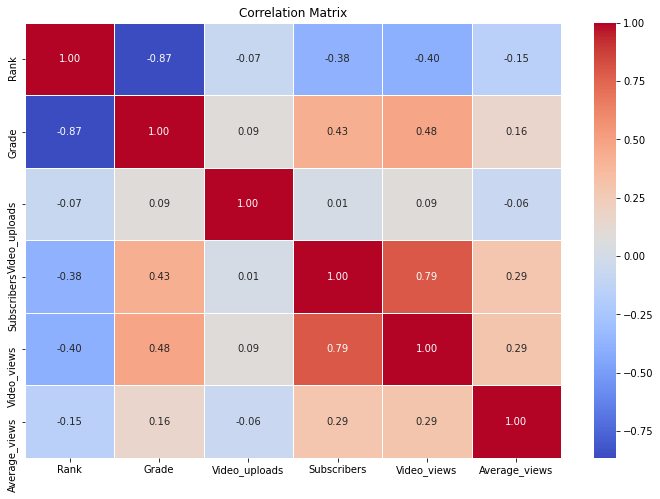

In [ ]:
# Select only numeric columns
numeric_columns = youtube_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#### Review data using scatter plots

<AxesSubplot:xlabel='Video_views', ylabel='Subscribers'>

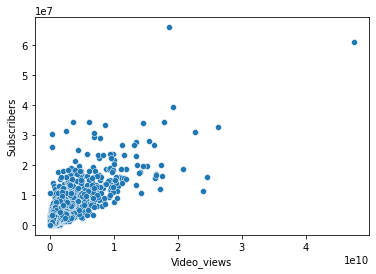

In [ ]:
sns.scatterplot(x="Video_views", y="Subscribers", data=youtube_data)

<AxesSubplot:xlabel='Video_views', ylabel='Video_uploads'>

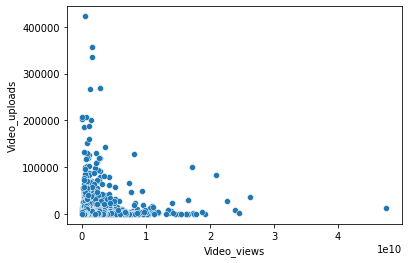

In [ ]:
sns.scatterplot(x="Video_views", y="Video_uploads", data=youtube_data)

<AxesSubplot:xlabel='Video_views', ylabel='Grade_letter'>

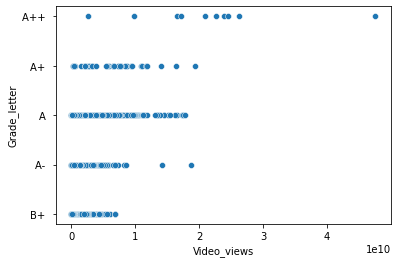

In [ ]:
sns.scatterplot(x="Video_views", y="Grade_letter", data=youtube_data)

<AxesSubplot:xlabel='Video_views', ylabel='Rank'>

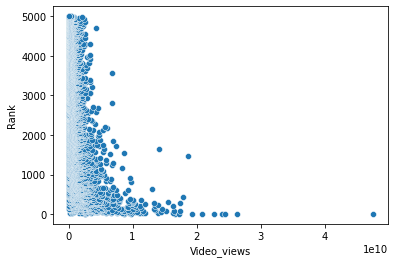

In [ ]:
sns.scatterplot(x="Video_views", y="Rank", data=youtube_data)

<AxesSubplot:xlabel='Grade_letter', ylabel='Subscribers'>

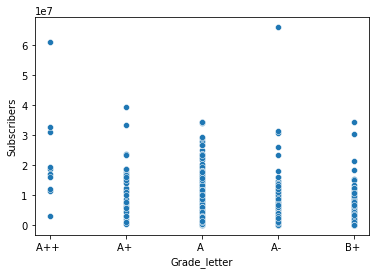

In [ ]:
sns.scatterplot(x="Grade_letter", y="Subscribers", data=youtube_data)

<AxesSubplot:xlabel='Rank', ylabel='Subscribers'>

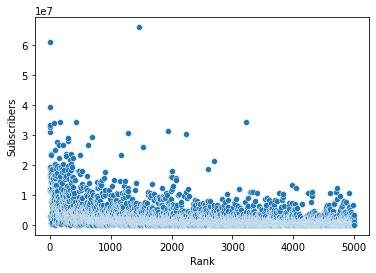

In [ ]:
sns.scatterplot(x="Rank", y="Subscribers", data=youtube_data)

#### Which Grade Has A Maximum Number of Video Uploads?

<AxesSubplot:xlabel='Grade_letter', ylabel='Video_uploads'>

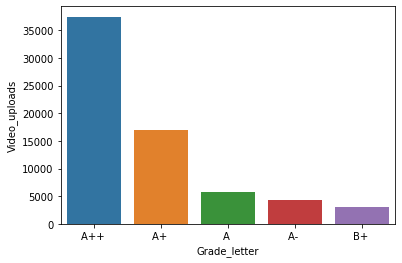

In [ ]:
# create bar plot 
sns.barplot(data=youtube_data, x='Grade_letter',y='Video_uploads', ci = None)

A++ grade has the highest video uploads 

#### Which Grade Has The Highest Average Views?

<AxesSubplot:xlabel='Grade_letter', ylabel='Average_views'>

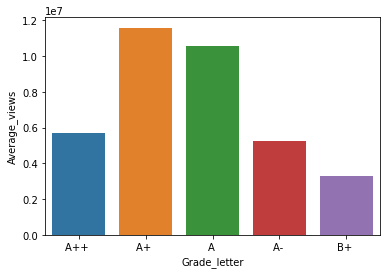

In [ ]:
sns.barplot(data=youtube_data, x='Grade_letter', y='Average_views', ci = None)

A+ grade has the highest average views

#### Which Grade has the Highest Number of Subscribers?

<AxesSubplot:xlabel='Grade_letter', ylabel='Subscribers'>

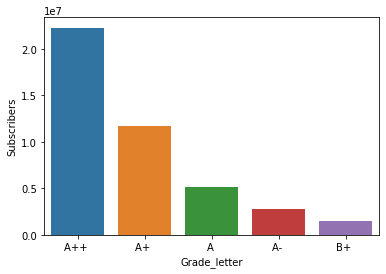

In [ ]:
sns.barplot(data=youtube_data, x='Grade_letter',y='Subscribers', ci = None)

A++ grade has the highest number of subscribers

##### 

####  Which Grade has the Highest Video Views?

<AxesSubplot:xlabel='Grade_letter', ylabel='Video_views'>

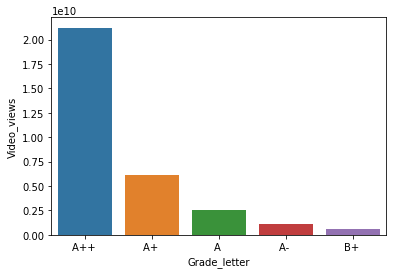

In [ ]:
sns.barplot(data=youtube_data, x='Grade_letter',y='Video_views', ci = None)

A++ grade has the highest number of video views

In [ ]:
youtube_data.groupby('Grade')['Video_views'].sum()

Grade
1    1511210409992
2    1037405476053
3    2240681735353
4     246749670909
5     211990911928
Name: Video_views, dtype: int64

In [ ]:
youtube_data.groupby('Grade').mean()

# Grade conversion 'A++ ': 5, 'A+ ':4, 'A ':3, 'A- ':2, 'B+ ':1

,Rank,Video_uploads,Subscribers,Video_views,Average_views
Grade,,,,,
1,3520.54,3136.16,1535207.95,555183839.09,3280380.88
2,1533.99,4382.58,2798520.38,1102450027.69,5254804.04
3,534.29,5709.86,5107136.29,2497972949.11,10540908.45
4,31.32,16960.30,11726947.47,6168741772.73,11577080.32
5,5.50,37450.70,22281762.50,21199091192.80,5688267.96
